# 1. Import required modules

In [1]:
import matplotlib
import numpy as np # arrays, fourier transformatie, matrixen, domein lineaire algabra
import pandas as pd # analyseren van data 
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
import sklearn as sl
#

# plotten
import matplotlib.pyplot as plt
%matplotlib inline

print('All libraries are installed')

All libraries are installed


# 2. Read data

In [4]:
dataset = pd.read_csv('dfFeaturesTGO_train.csv')

# 3. Data exploration

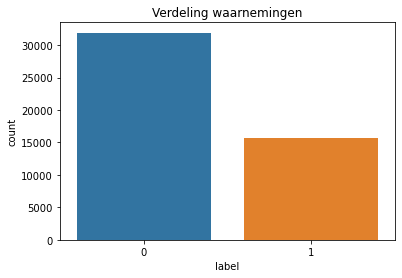

In [5]:
dataset['label'].value_counts()

sns.countplot(x='label', data=dataset)
plt.title("Verdeling waarnemingen")
plt.show()

# dataset.info()


**Evaluating possible Null data:** <br>
In case of missing data the ML model might malfunction. We need to be aware of any missing data and may need to remove this observation from our dataset.
If there's no white in the figure below, then there is no missing data.

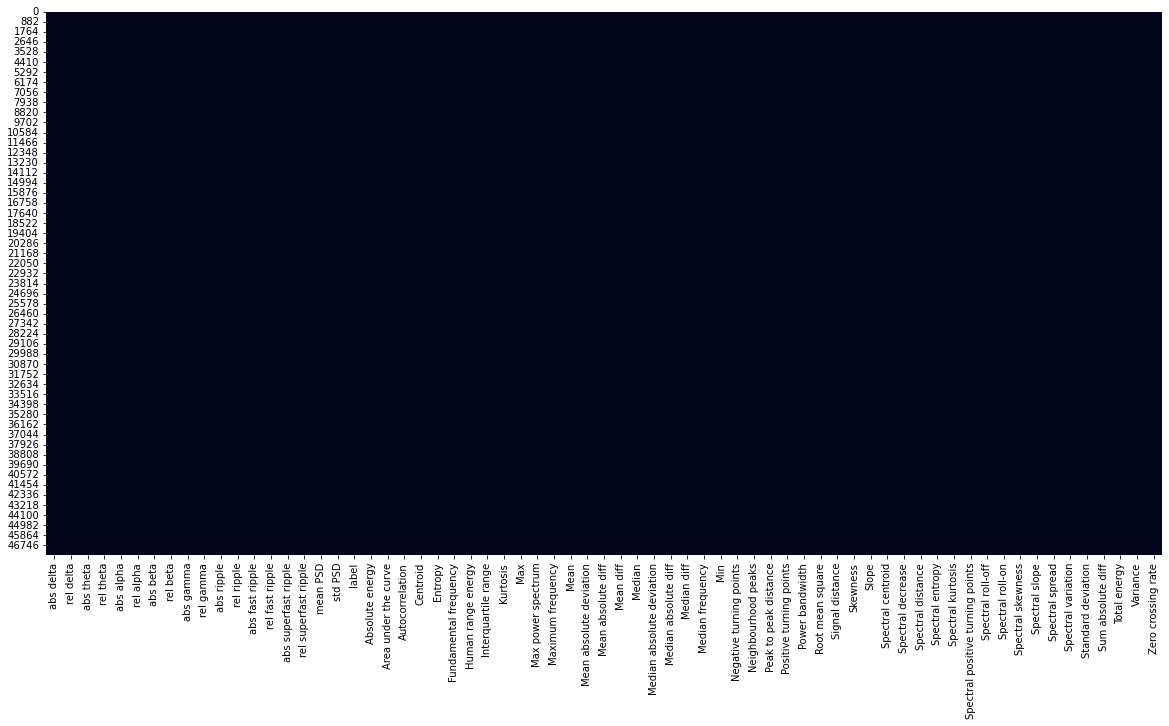

In [4]:
dataset.isnull()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

### **Formulate X and Y:**

In [6]:
X_features = dataset.drop(columns=['label'])
Y_label=dataset['label']        #bestaat als het goed is uit 200 samples verdeeld over 2 classes: 1= epileptisch, 0=niet-epileptisch


**Visualizing datadistribution per feature:**

C:\Users\margo\AppData\Local\Temp/ipykernel_17584/1586475963.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


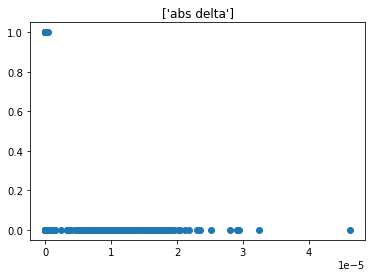

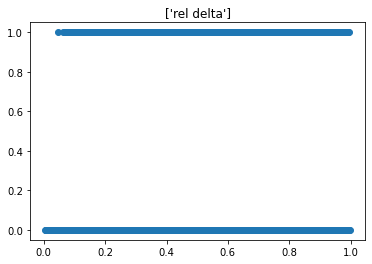

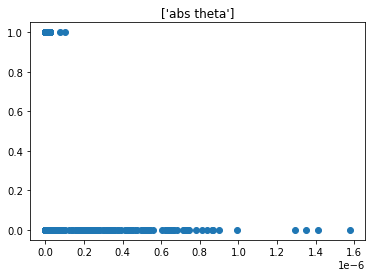

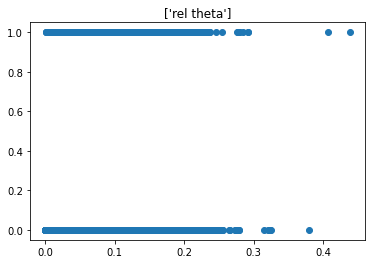

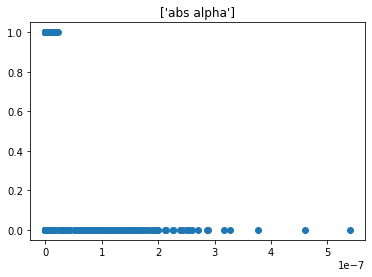

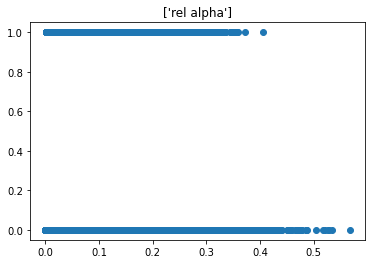

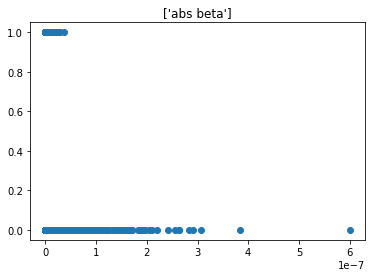

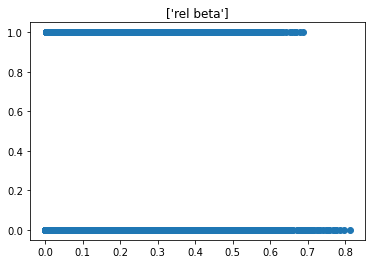

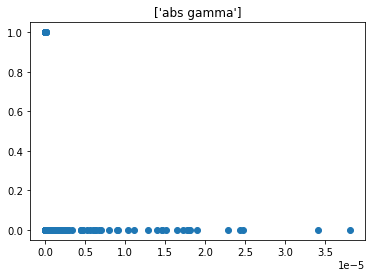

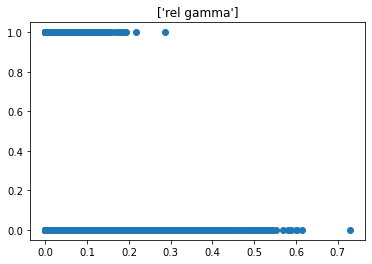

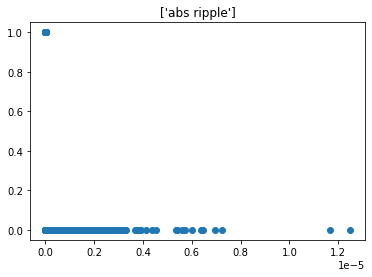

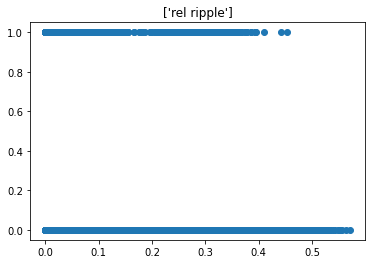

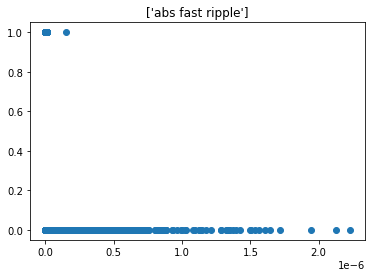

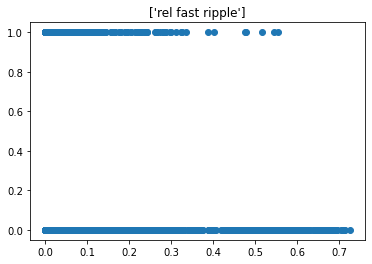

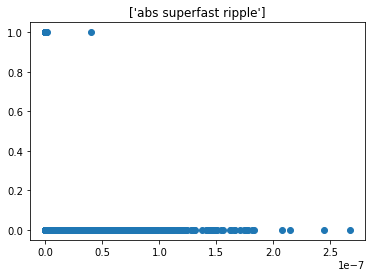

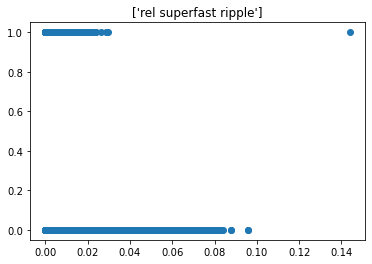

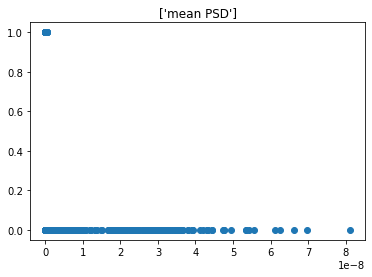

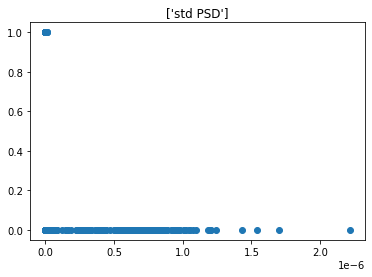

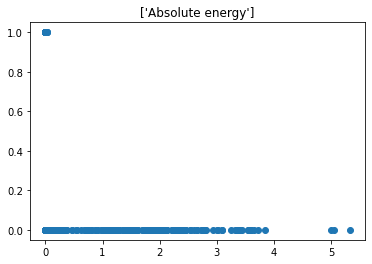

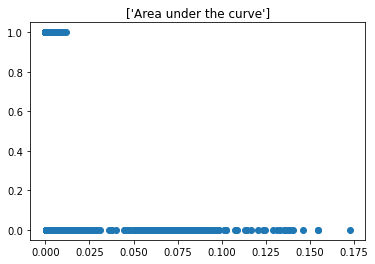

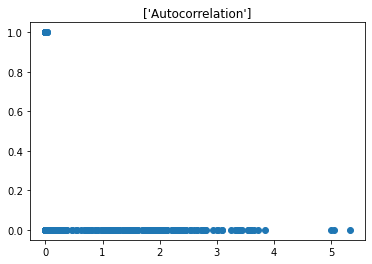

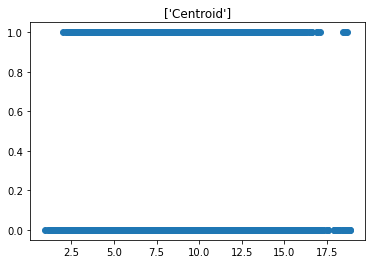

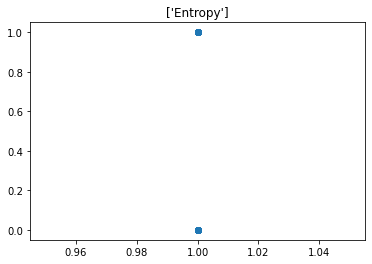

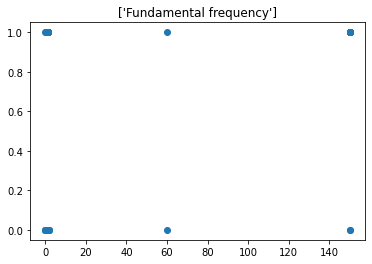

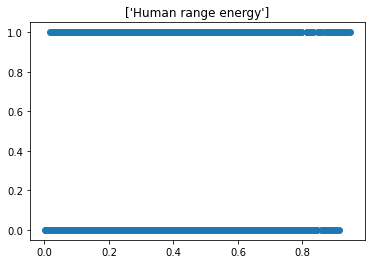

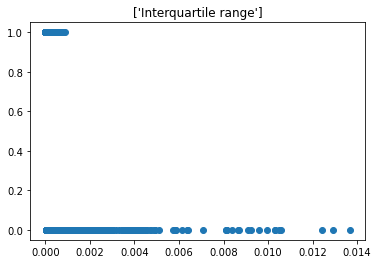

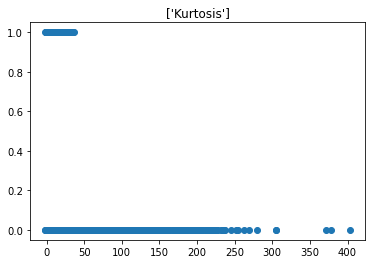

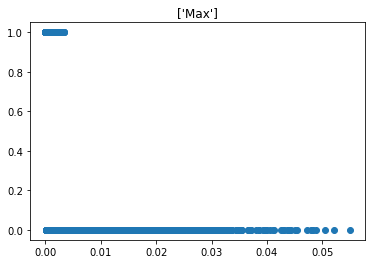

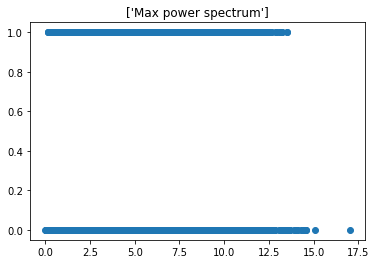

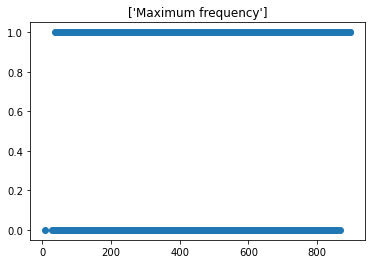

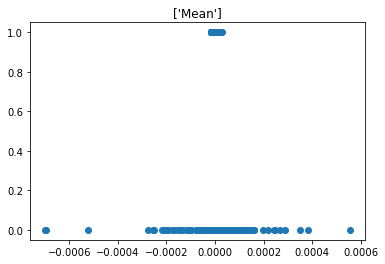

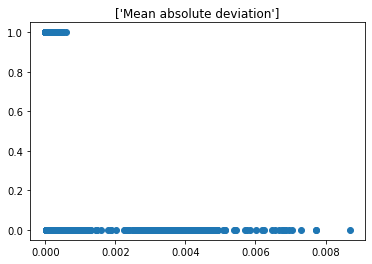

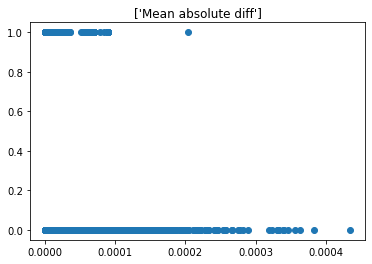

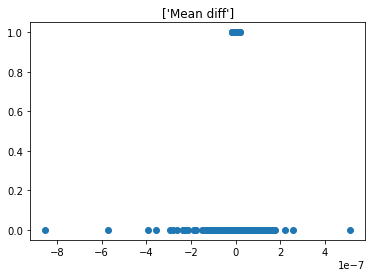

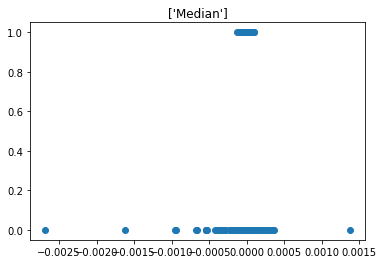

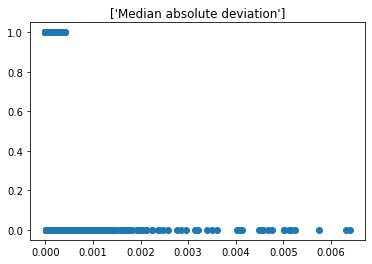

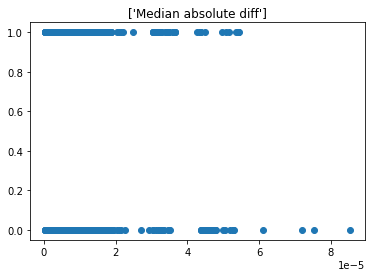

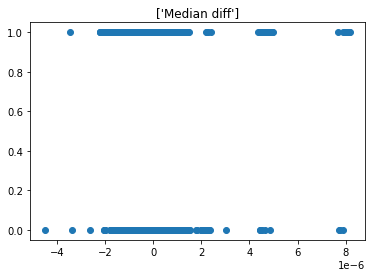

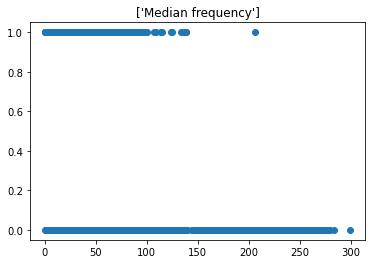

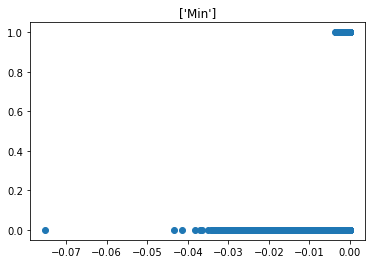

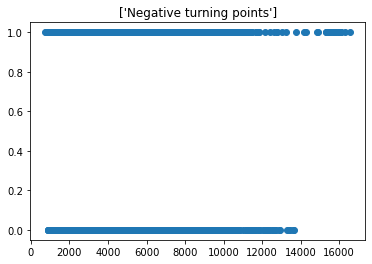

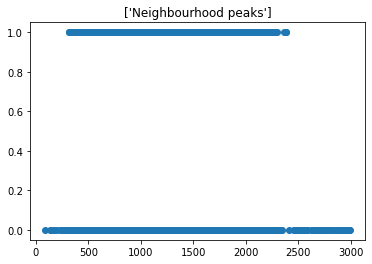

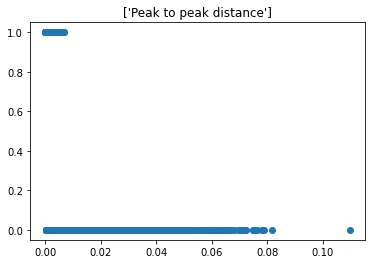

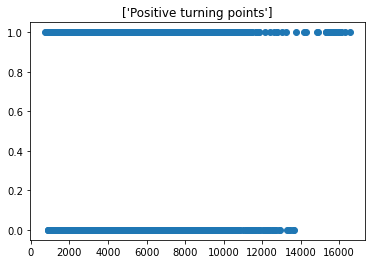

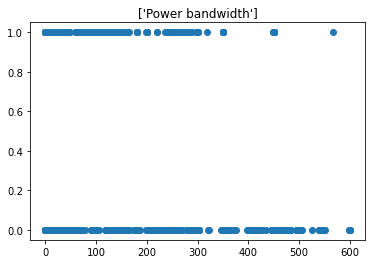

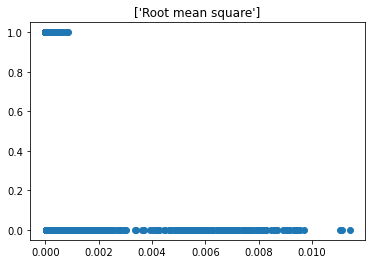

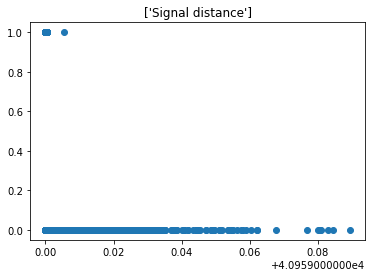

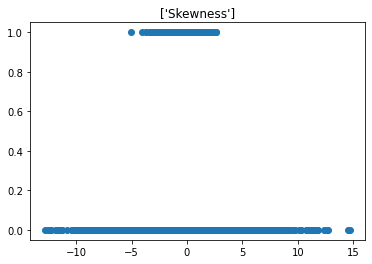

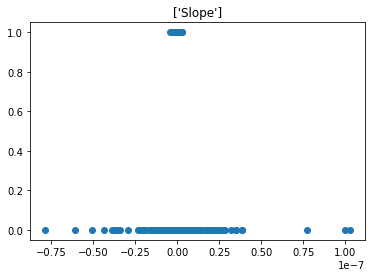

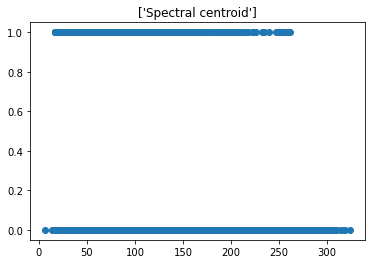

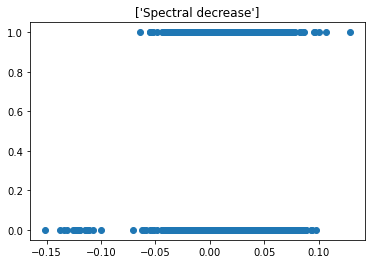

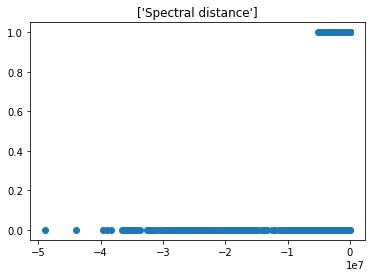

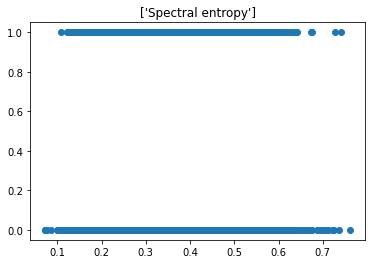

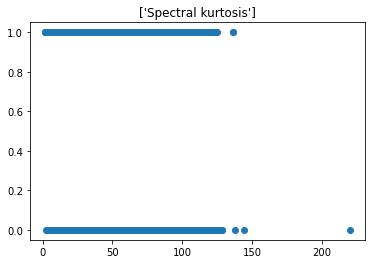

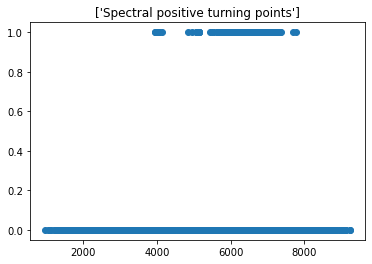

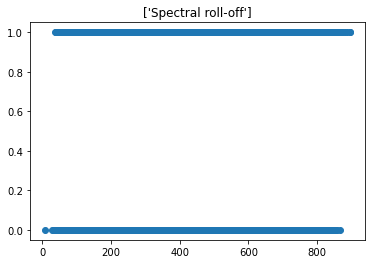

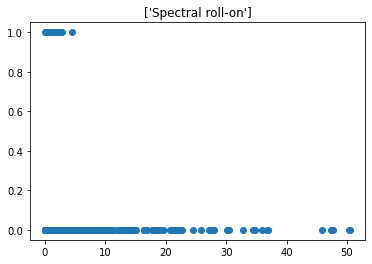

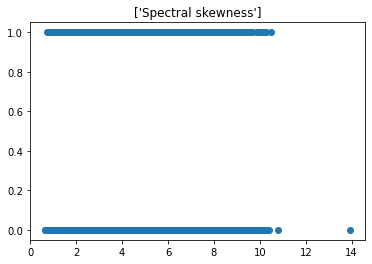

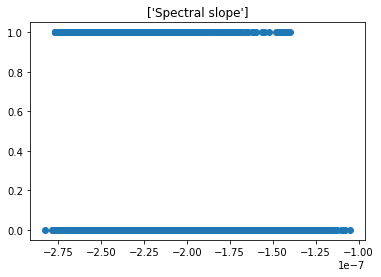

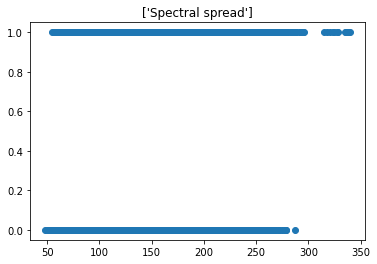

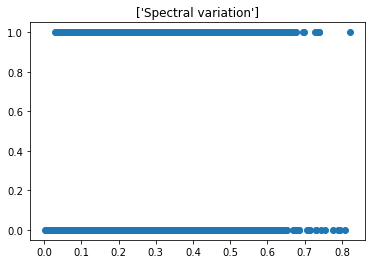

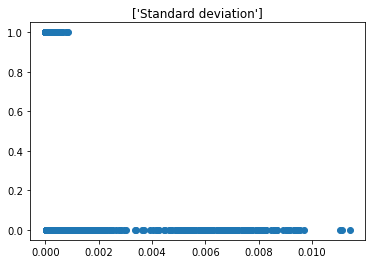

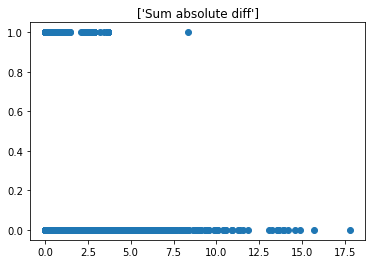

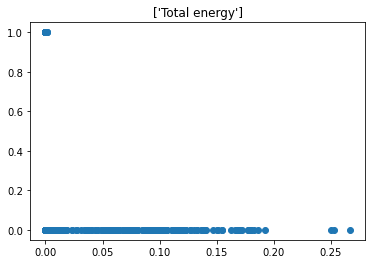

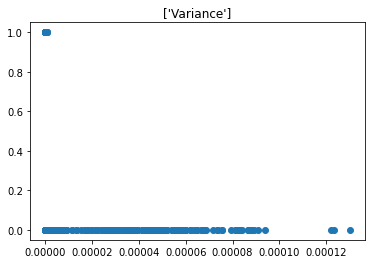

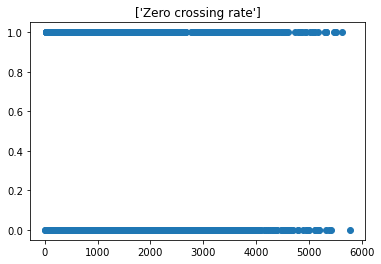

In [7]:
features = ['abs delta', 'rel delta', 'abs theta', 'rel theta',
       'abs alpha', 'rel alpha', 'abs beta', 'rel beta', 'abs gamma',
       'rel gamma', 'abs ripple', 'rel ripple', 'abs fast ripple',
       'rel fast ripple', 'abs superfast ripple', 'rel superfast ripple',
       'mean PSD', 'std PSD', 'Absolute energy',
       'Area under the curve', 'Autocorrelation', 'Centroid', 'Entropy',
       'Fundamental frequency', 'Human range energy', 'Interquartile range',
       'Kurtosis', 'Max', 'Max power spectrum', 'Maximum frequency', 'Mean',
       'Mean absolute deviation', 'Mean absolute diff', 'Mean diff', 'Median',
       'Median absolute deviation', 'Median absolute diff', 'Median diff',
       'Median frequency', 'Min', 'Negative turning points',
       'Neighbourhood peaks', 'Peak to peak distance',
       'Positive turning points', 'Power bandwidth', 'Root mean square',
       'Signal distance', 'Skewness', 'Slope', 'Spectral centroid',
       'Spectral decrease', 'Spectral distance', 'Spectral entropy',
       'Spectral kurtosis', 'Spectral positive turning points',
       'Spectral roll-off', 'Spectral roll-on', 'Spectral skewness',
       'Spectral slope', 'Spectral spread', 'Spectral variation',
       'Standard deviation', 'Sum absolute diff', 'Total energy', 'Variance',
       'Zero crossing rate']

for i in features[:]:
    plt.figure()
    plt.title([i])
    plt.scatter(dataset[i],dataset['label'])


### **Histogram of distribution of observations per feature:** <br>
Giving insight in the distribution of features for non-epileptic and epileptic observations.

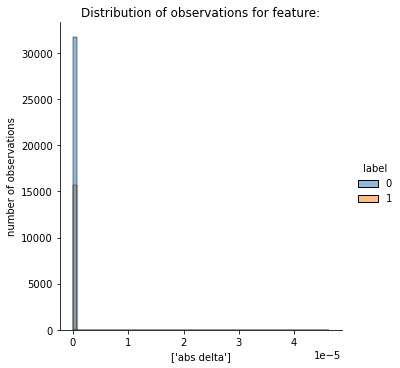

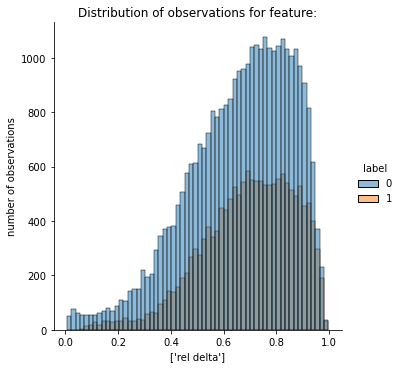

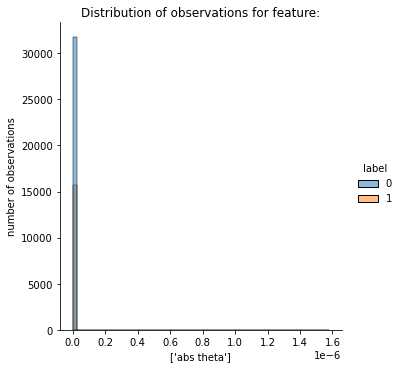

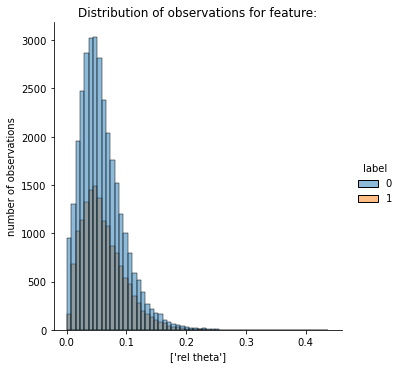

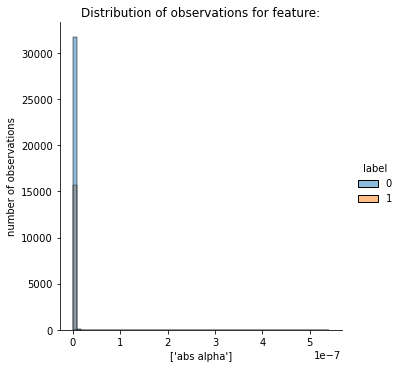

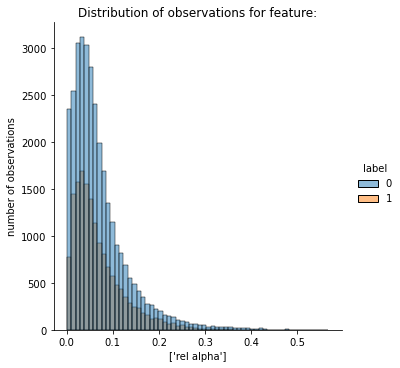

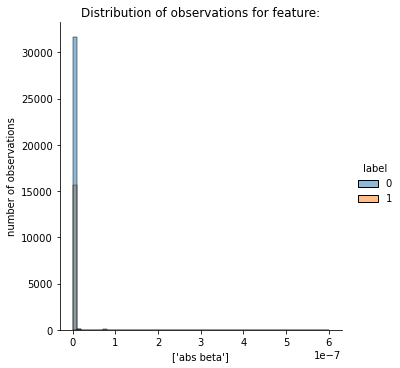

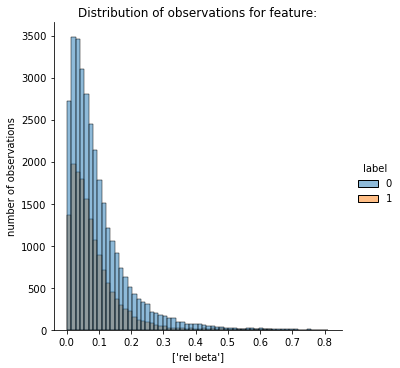

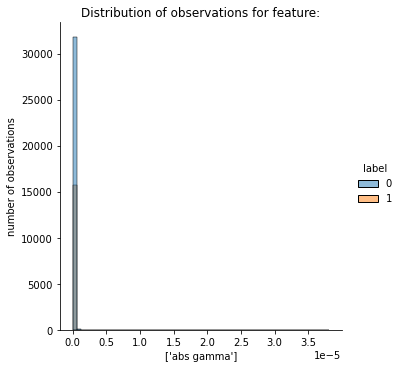

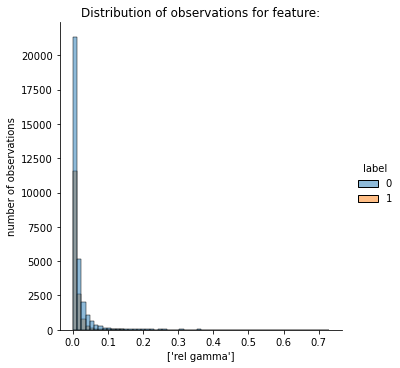

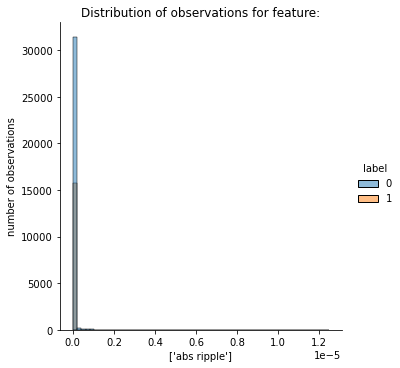

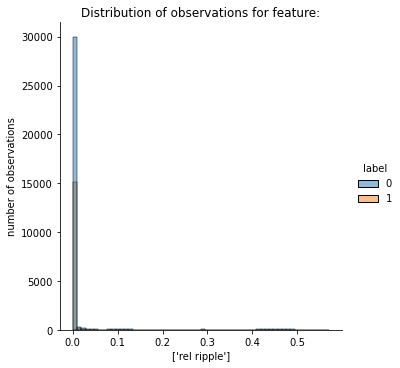

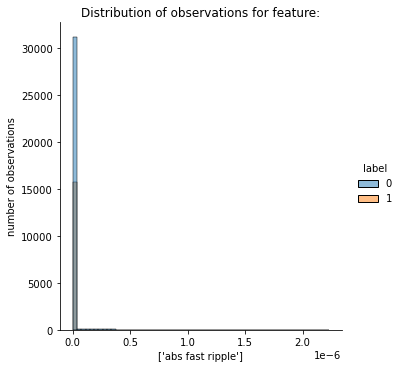

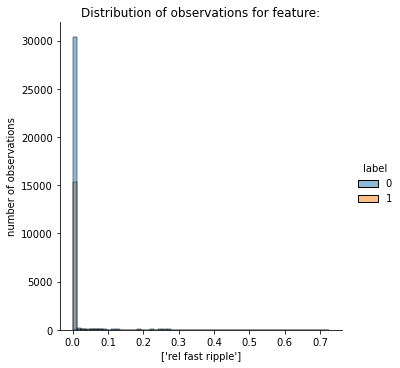

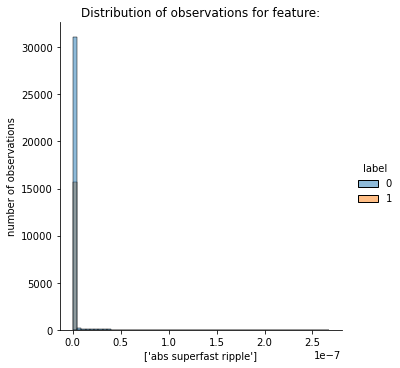

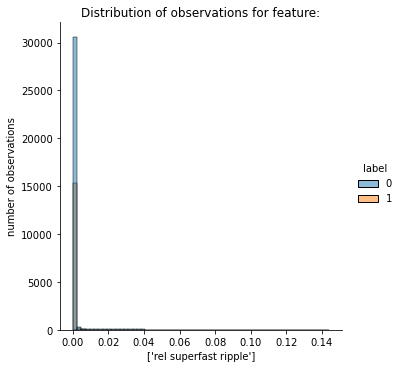

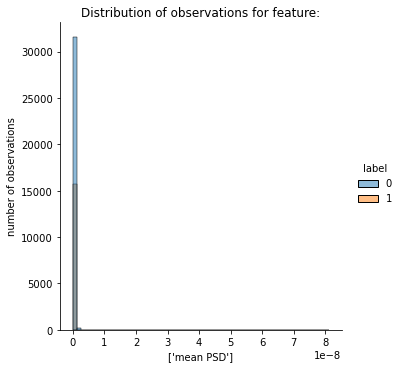

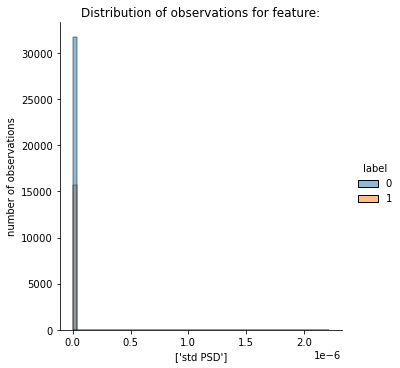

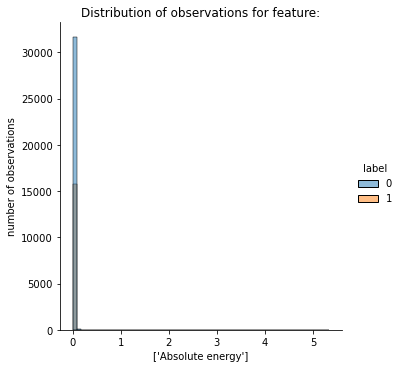

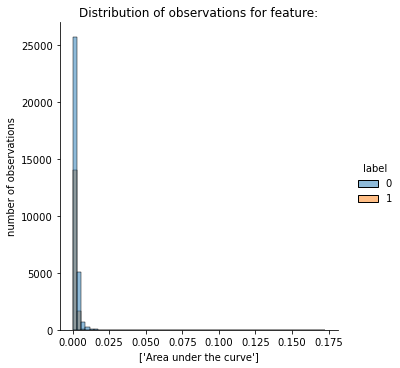

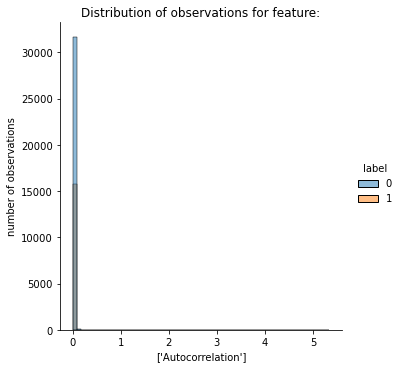

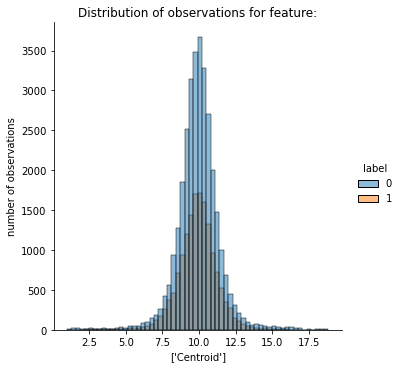

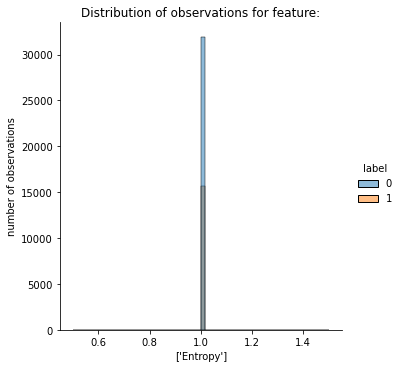

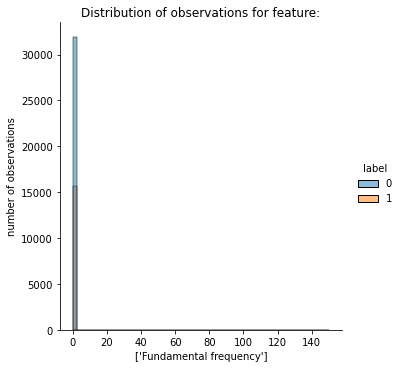

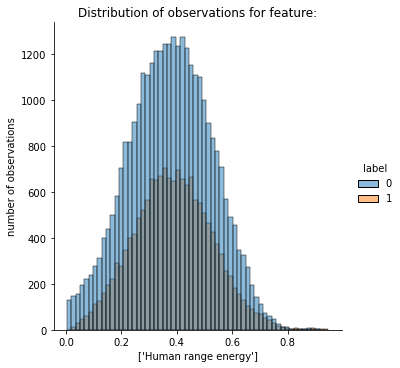

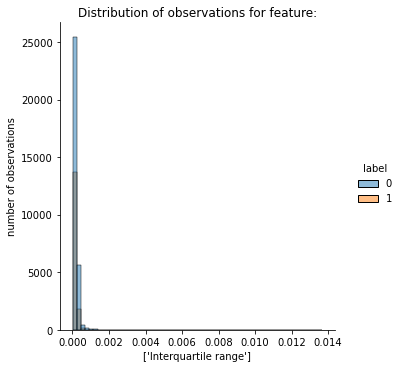

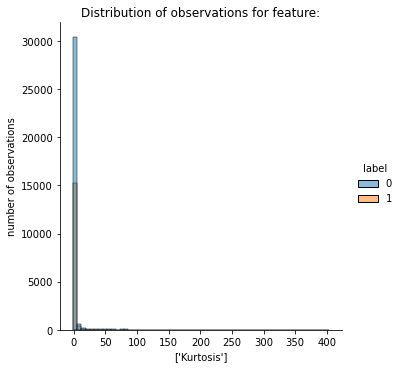

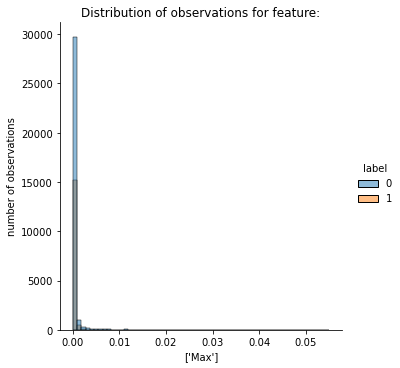

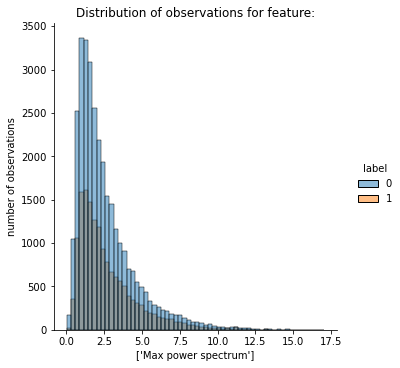

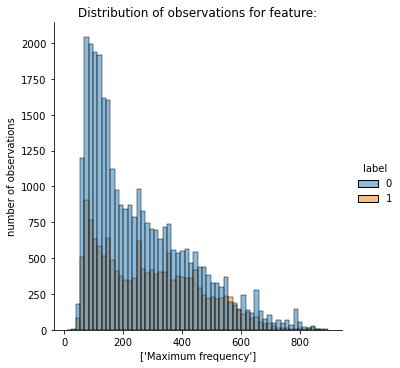

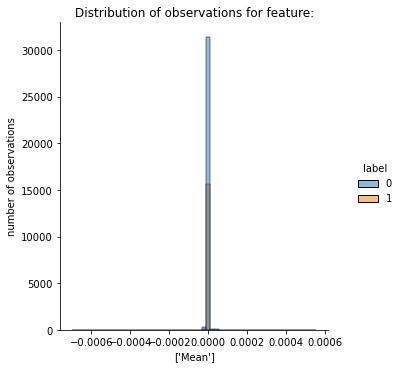

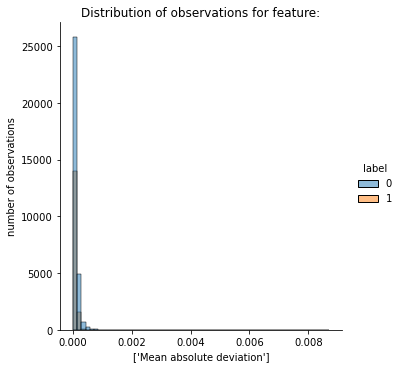

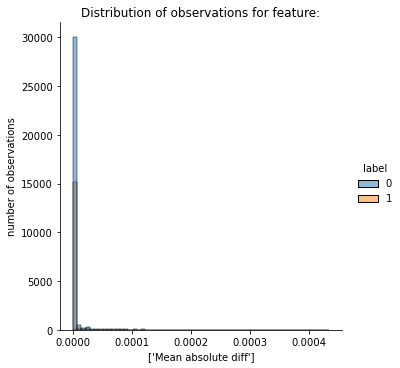

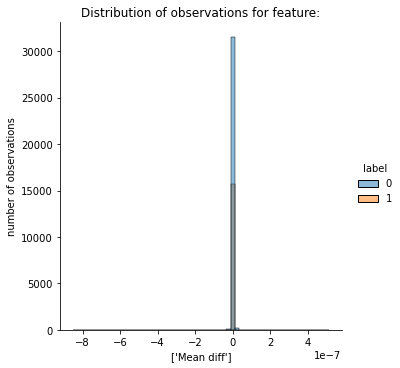

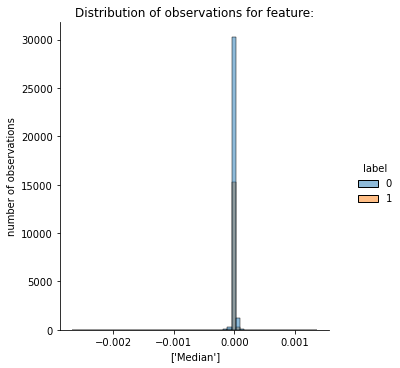

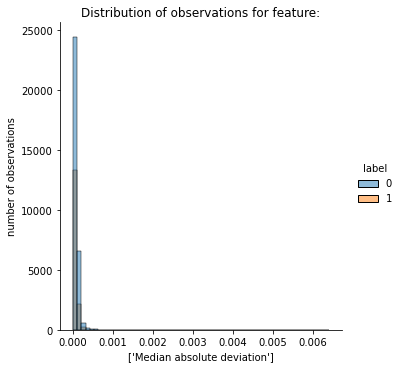

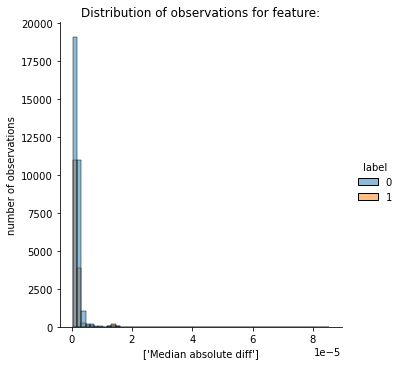

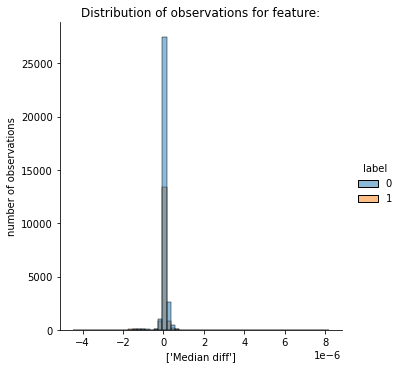

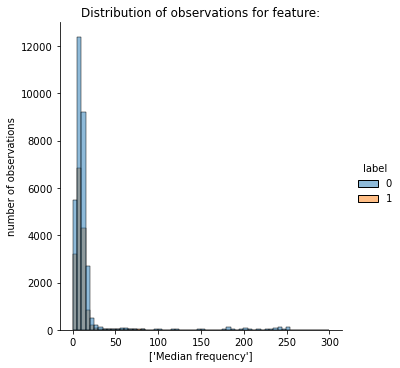

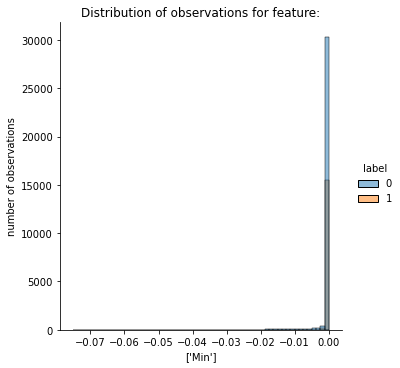

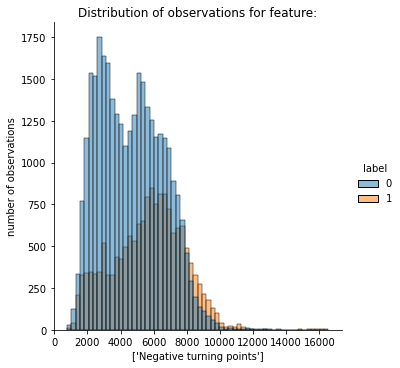

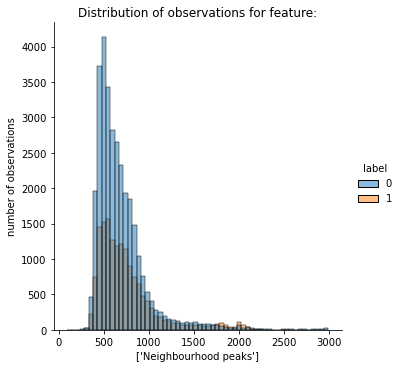

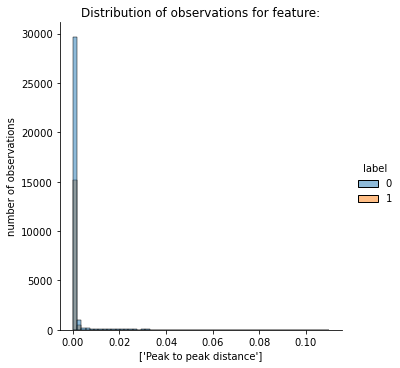

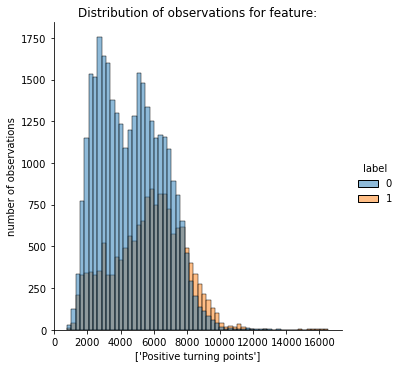

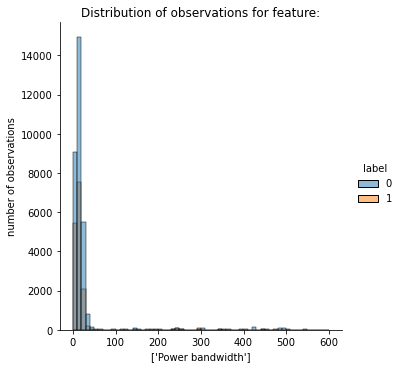

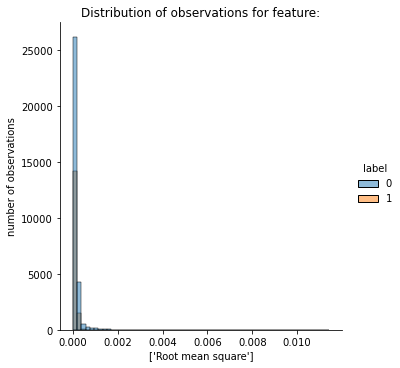

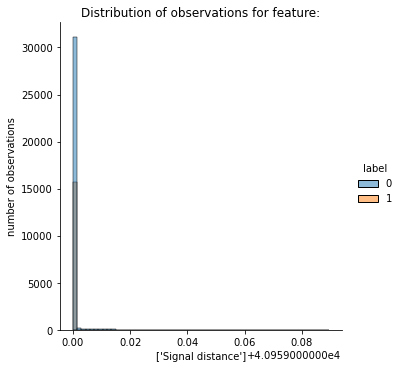

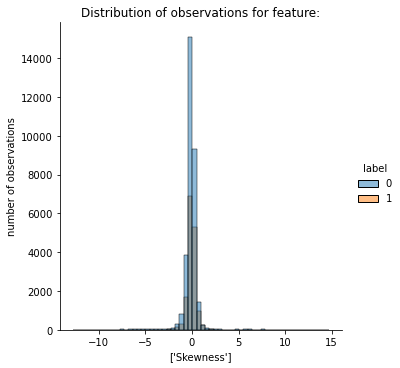

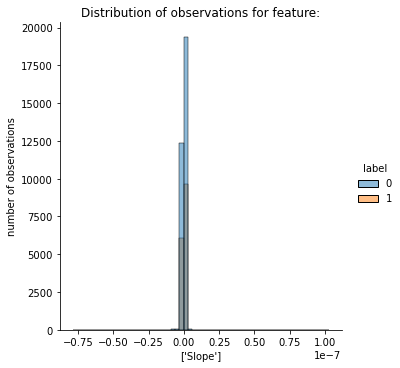

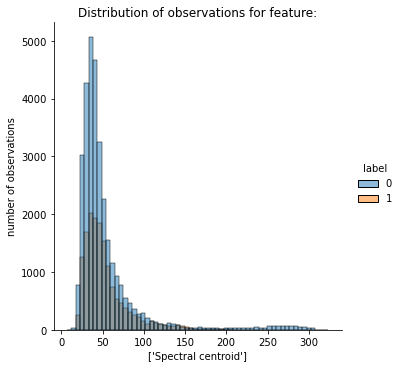

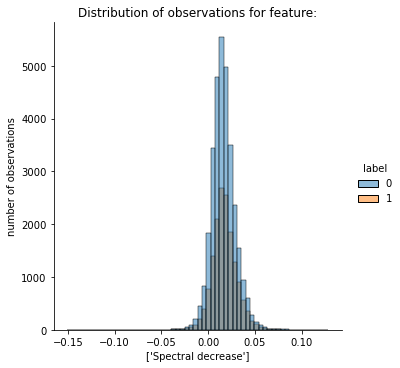

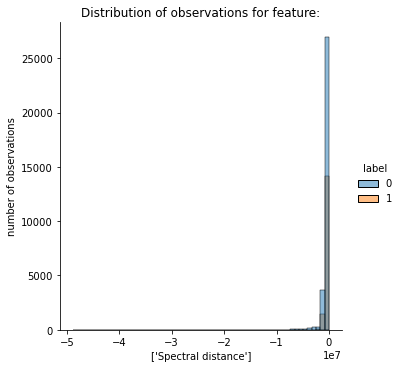

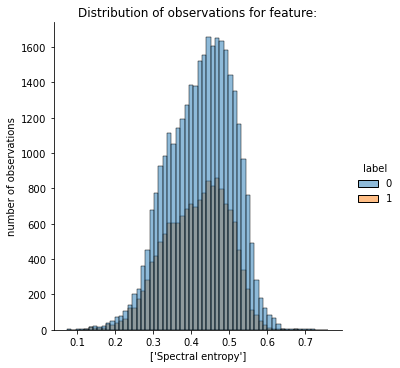

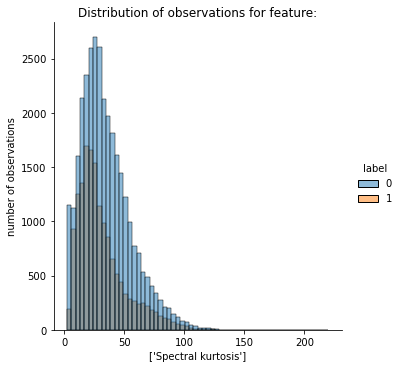

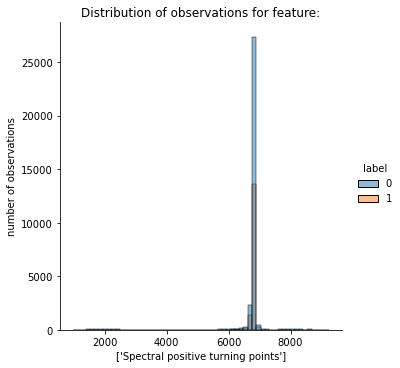

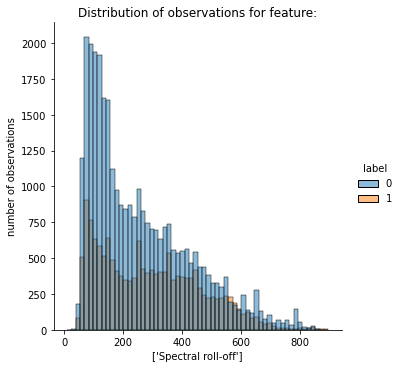

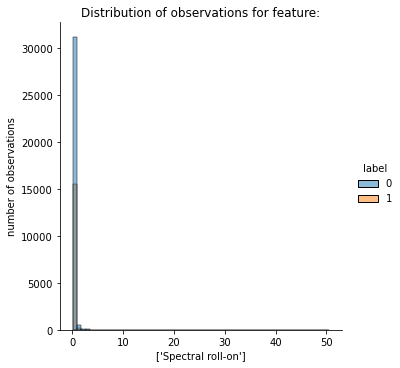

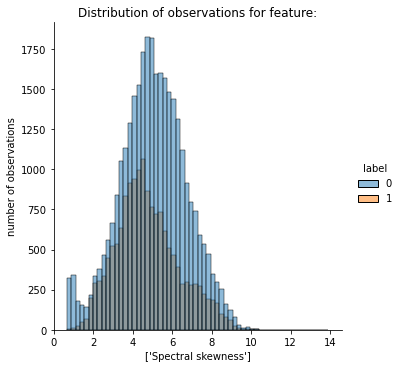

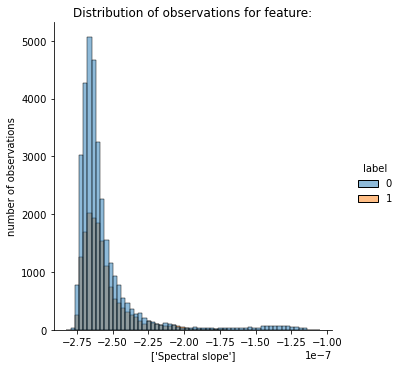

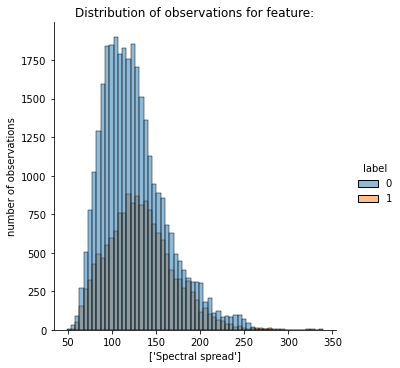

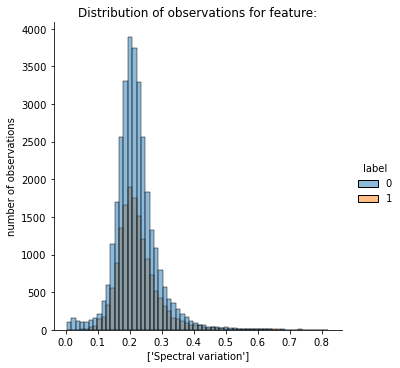

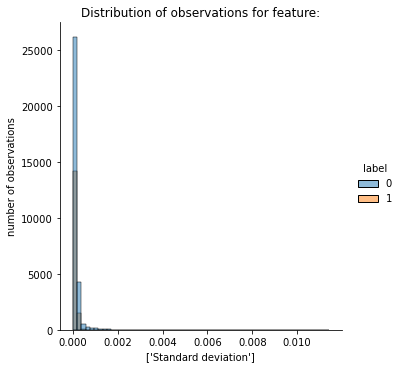

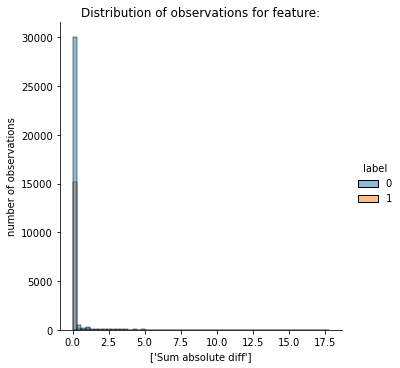

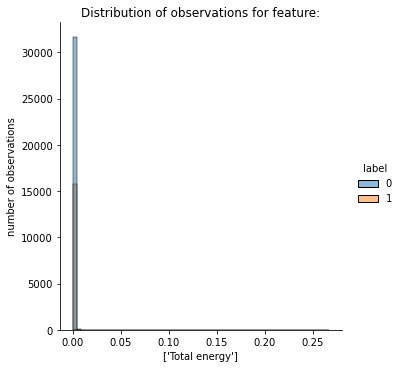

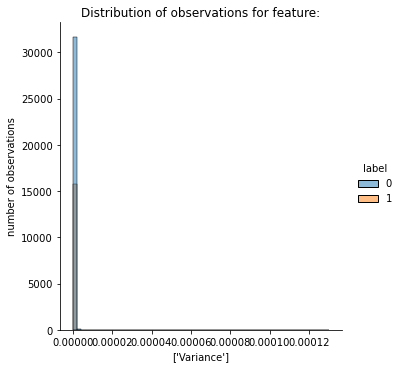

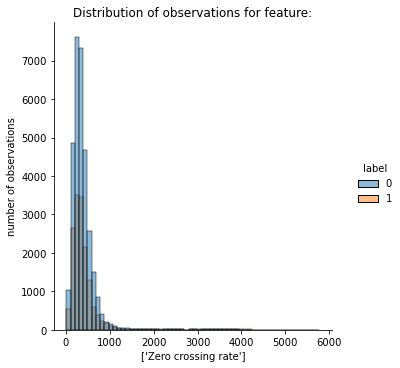

In [10]:
for i in features[:]:
    
    sns.displot(dataset, x =dataset[i], kde=False, hue='label', bins=60)
    # plt.legend(prop={'size':12}, )
    plt.title('Distribution of observations for feature:')
    plt.xlabel([i])
    plt.ylabel('number of observations')
    plt.show()

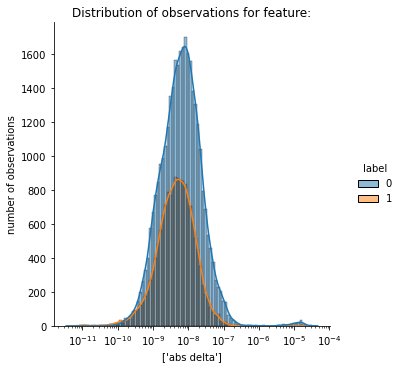

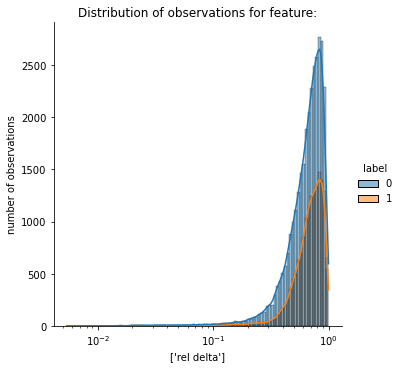

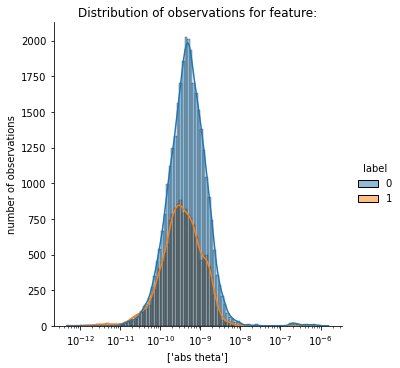

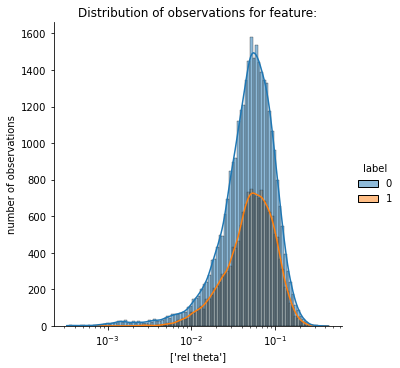

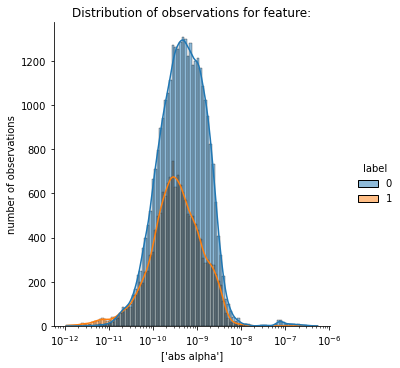

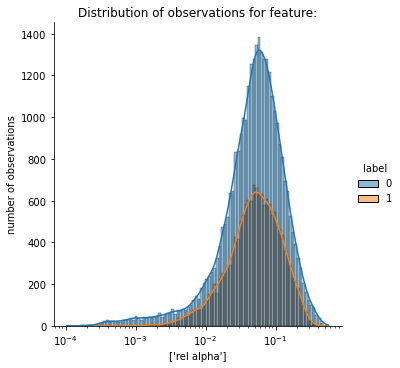

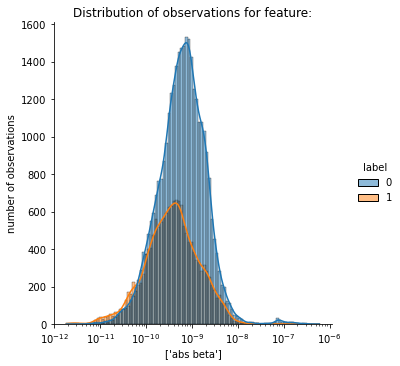

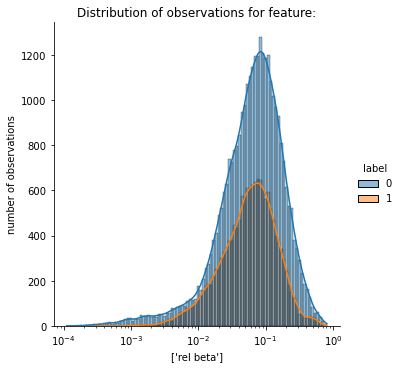

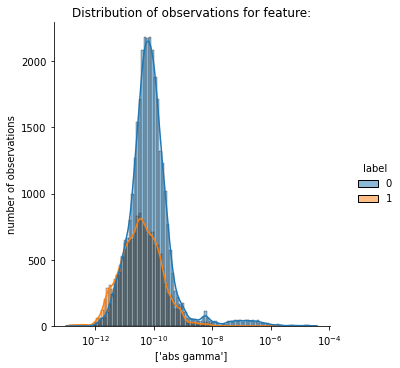

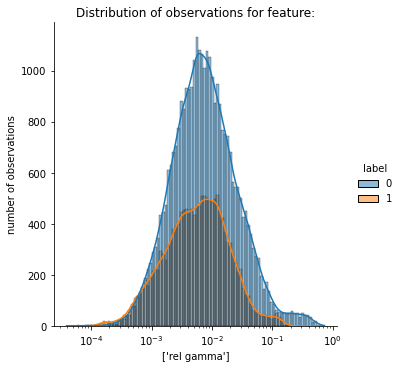

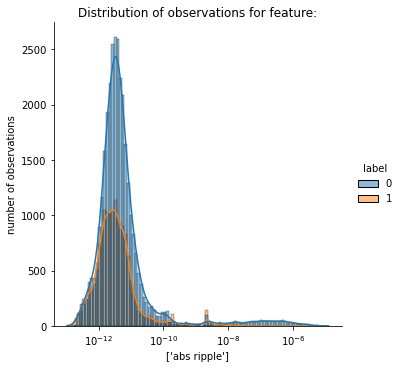

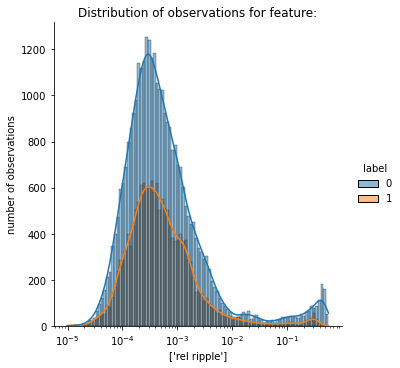

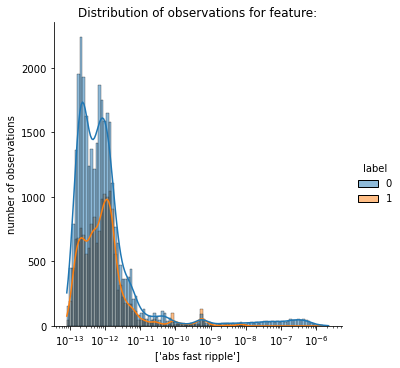

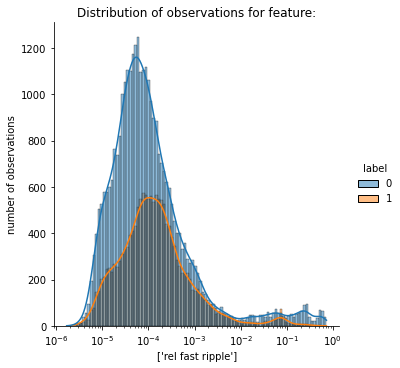

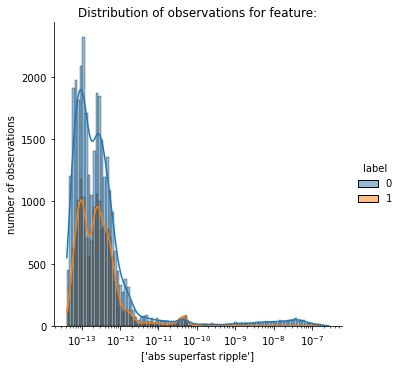

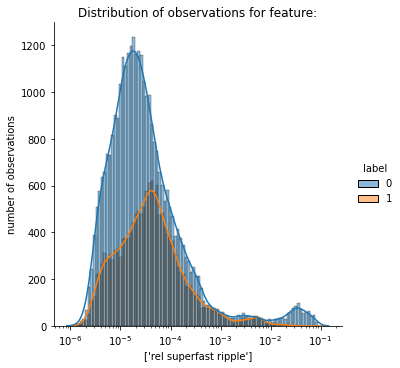

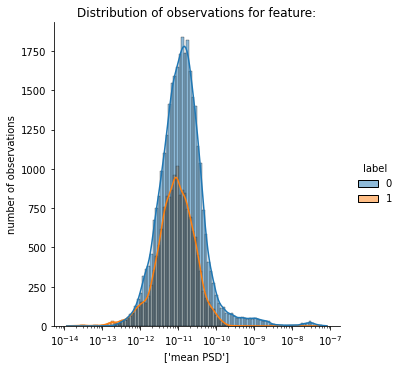

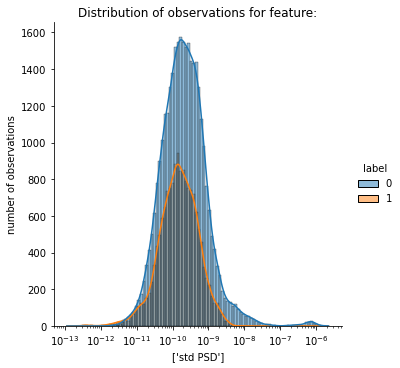

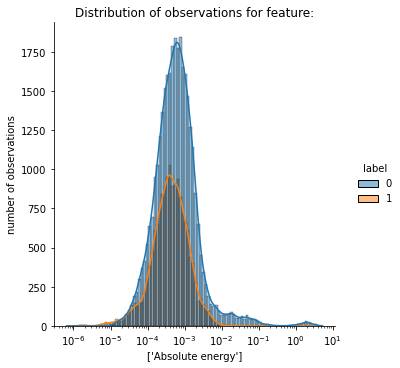

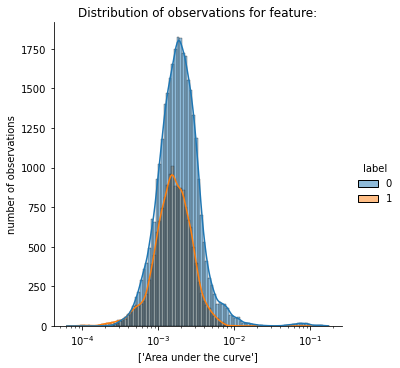

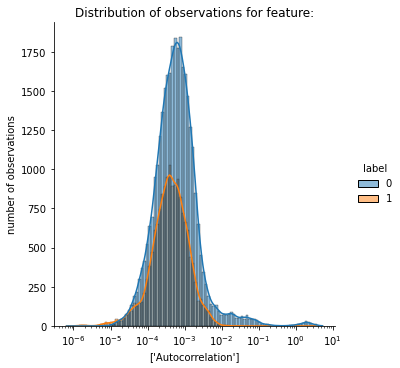

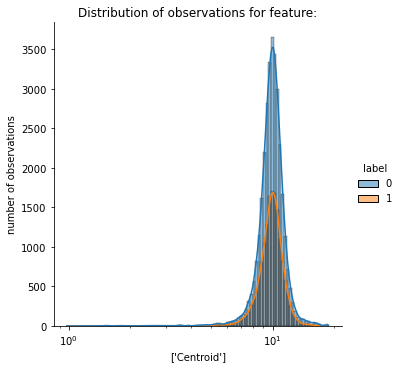

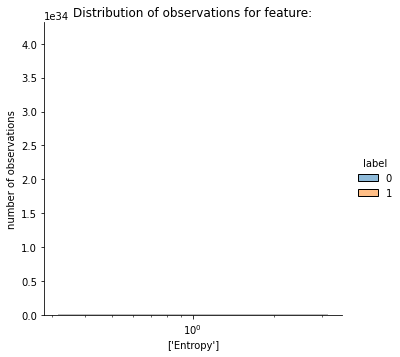

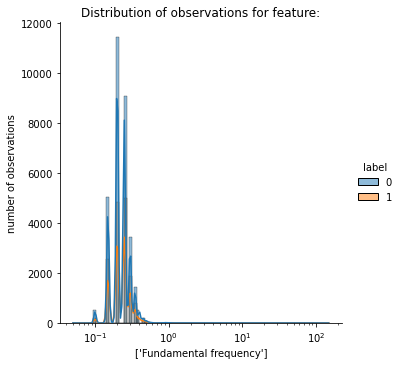

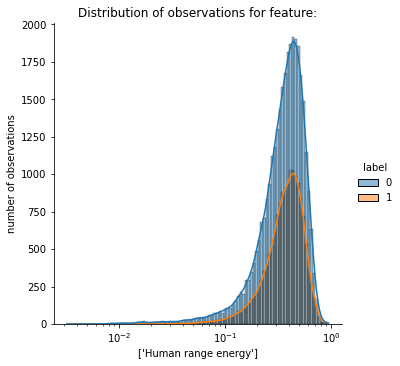

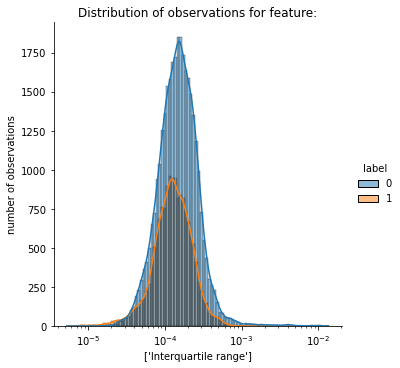

c:\Users\margo\anaconda3\envs\baseupdated\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


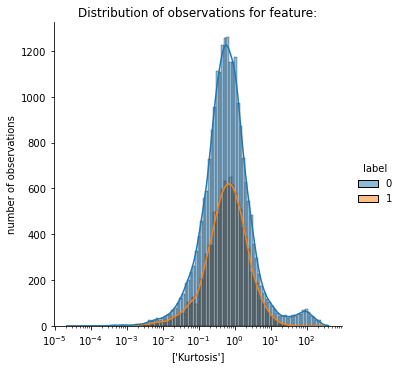

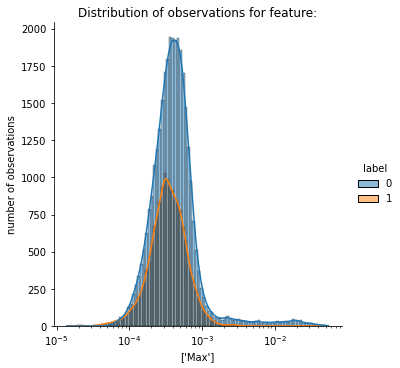

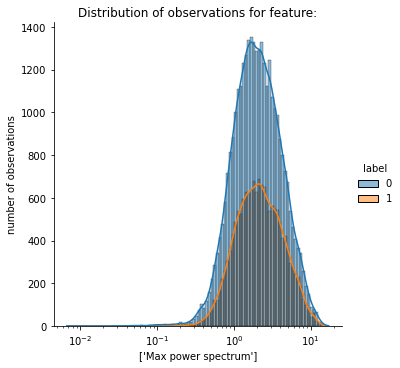

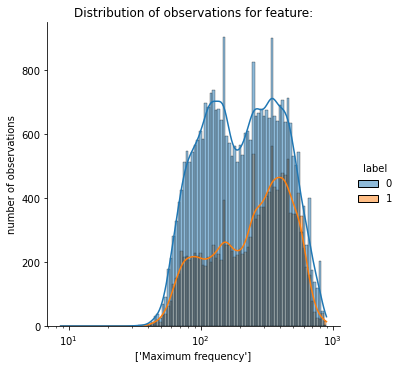

c:\Users\margo\anaconda3\envs\baseupdated\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


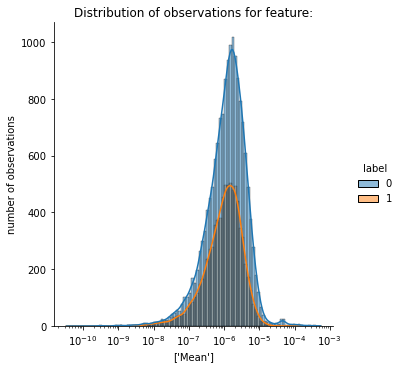

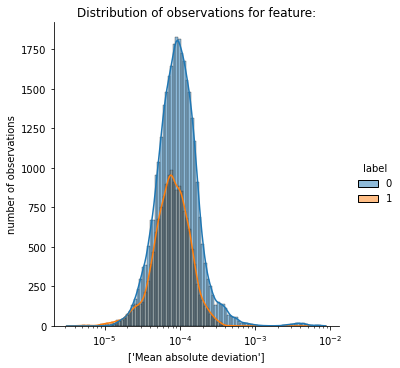

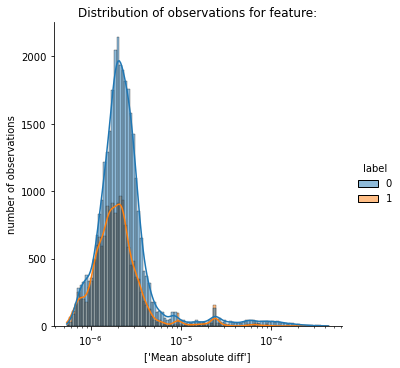

c:\Users\margo\anaconda3\envs\baseupdated\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


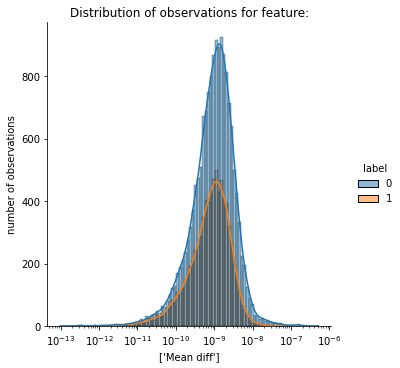

c:\Users\margo\anaconda3\envs\baseupdated\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


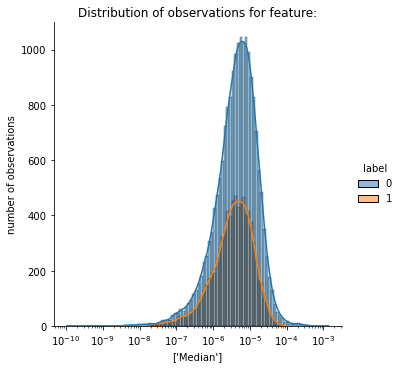

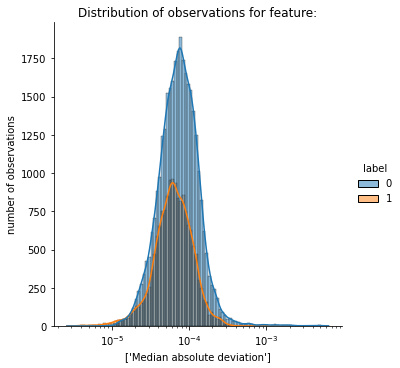

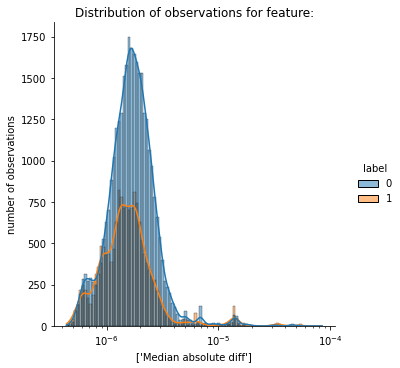

c:\Users\margo\anaconda3\envs\baseupdated\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


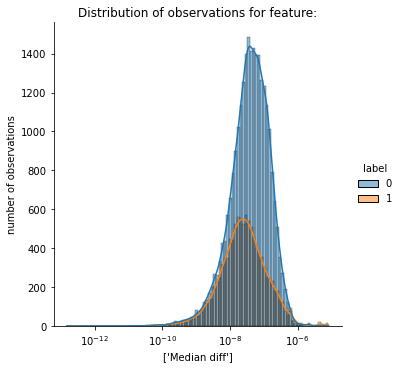

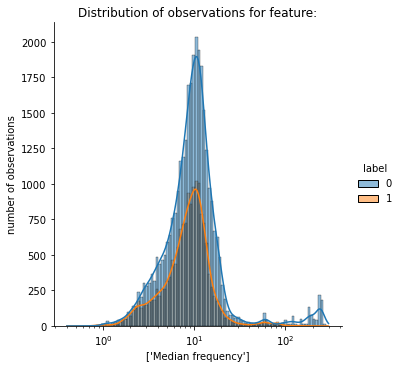

c:\Users\margo\anaconda3\envs\baseupdated\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: `dataset` input should have multiple elements.

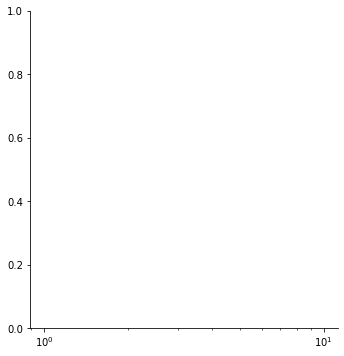

In [8]:
for i in features[:]:
    
    sns.displot(dataset, x =dataset[i], kde=True, hue='label', bins=100, log_scale=True)
    # plt.legend(prop={'size':12}, )
    plt.title('Distribution of observations for feature:')
    plt.xlabel([i])
    plt.ylabel('number of observations')
    plt.show()

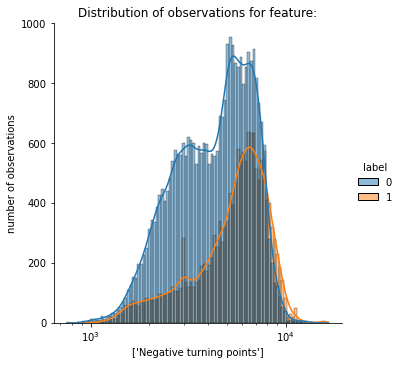

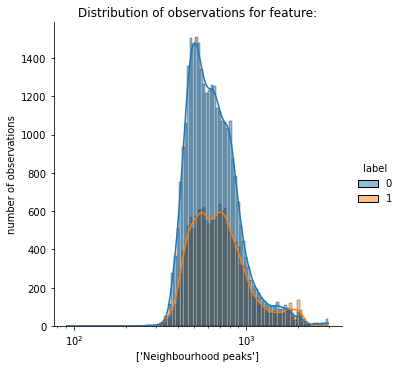

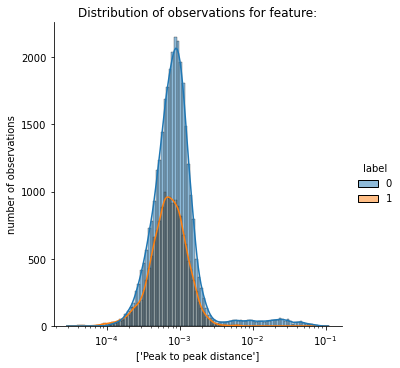

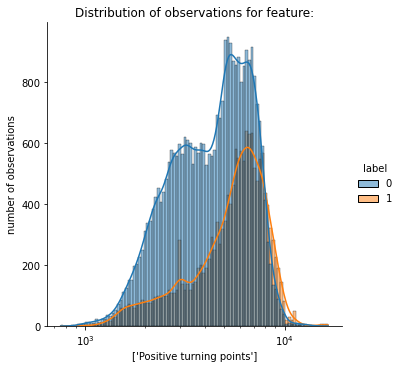

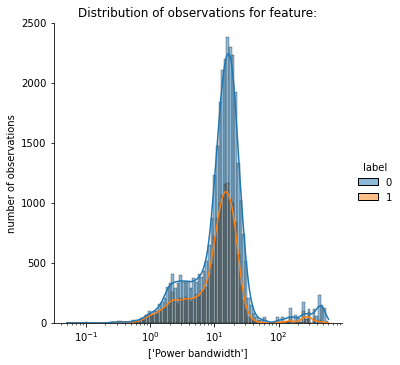

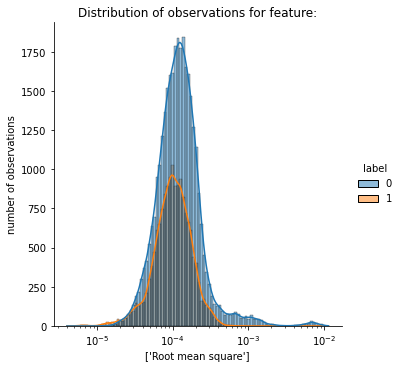

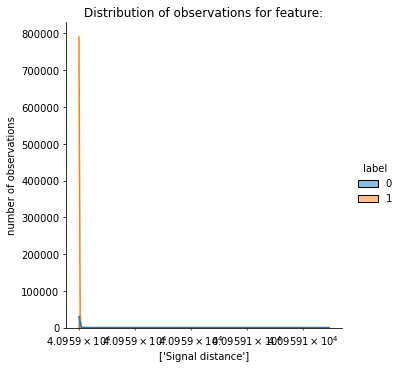

c:\Users\margo\anaconda3\envs\baseupdated\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


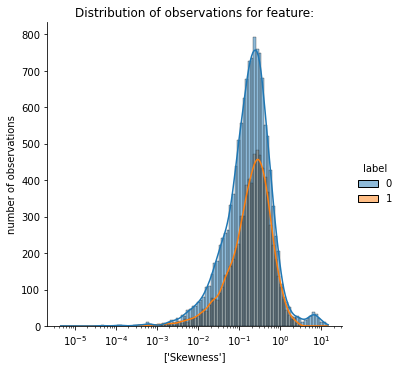

c:\Users\margo\anaconda3\envs\baseupdated\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


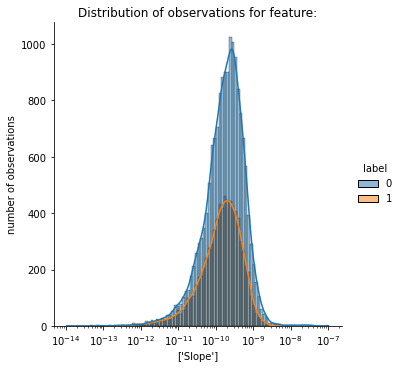

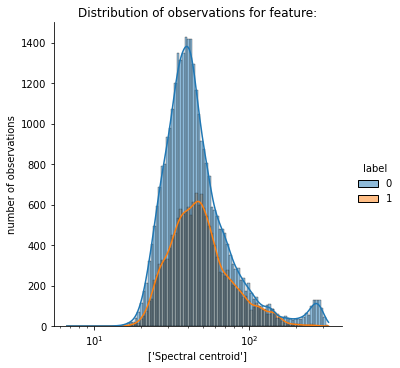

c:\Users\margo\anaconda3\envs\baseupdated\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


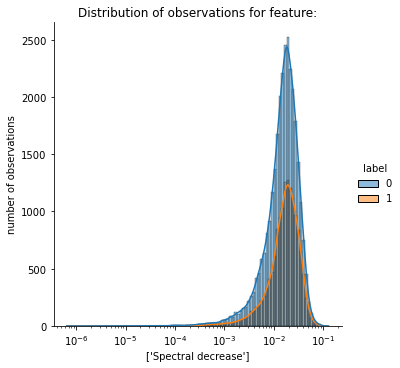

c:\Users\margo\anaconda3\envs\baseupdated\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: `dataset` input should have multiple elements.

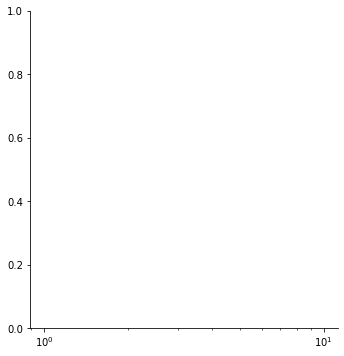

In [9]:
for i in features[40:]:
    
    sns.displot(dataset, x =dataset[i], kde=True, hue='label', bins=100, log_scale=True)
    # plt.legend(prop={'size':12}, )
    plt.title('Distribution of observations for feature:')
    plt.xlabel([i])
    plt.ylabel('number of observations')
    plt.show()

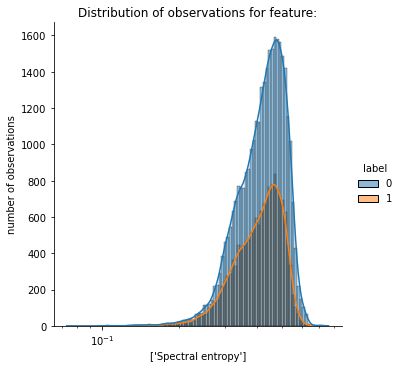

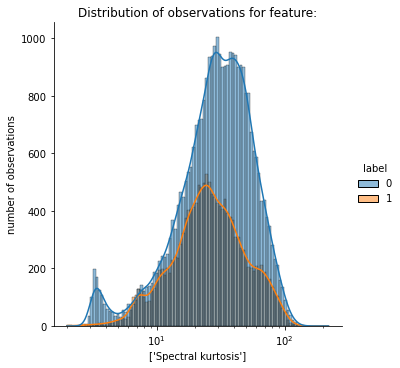

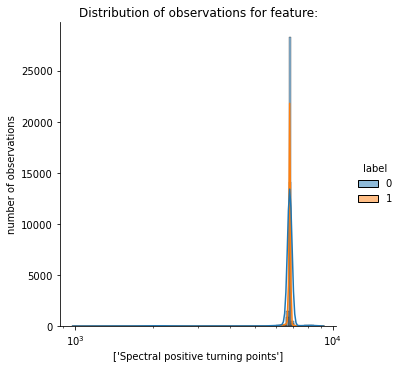

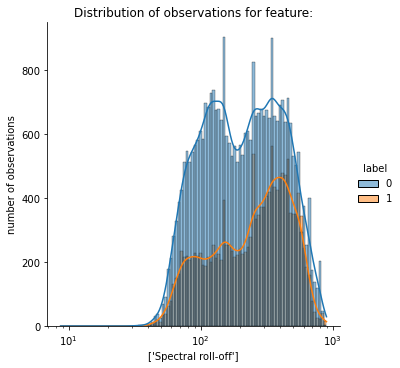

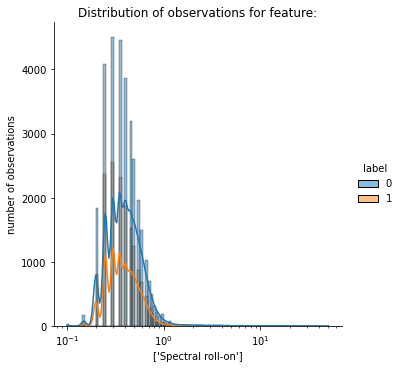

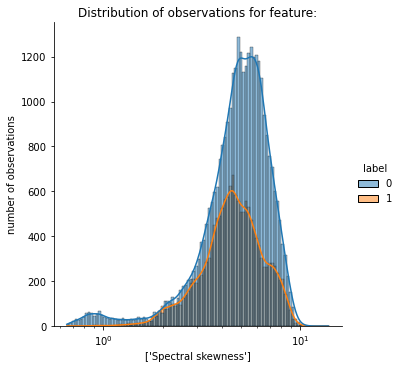

c:\Users\margo\anaconda3\envs\baseupdated\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: `dataset` input should have multiple elements.

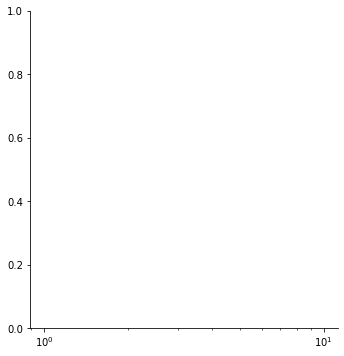

In [11]:
for i in features[52:]:
    
    sns.displot(dataset, x =dataset[i], kde=True, hue='label', bins=100, log_scale=True)
    # plt.legend(prop={'size':12}, )
    plt.title('Distribution of observations for feature:')
    plt.xlabel([i])
    plt.ylabel('number of observations')
    plt.show()

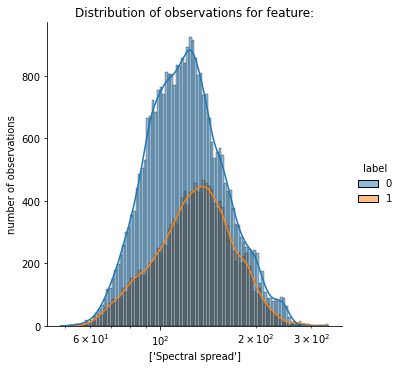

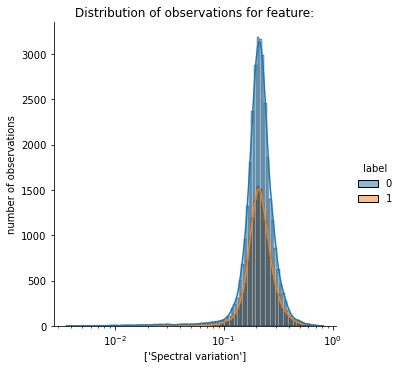

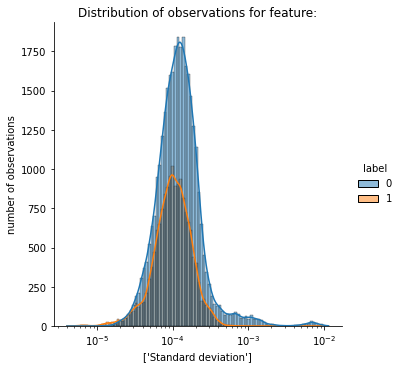

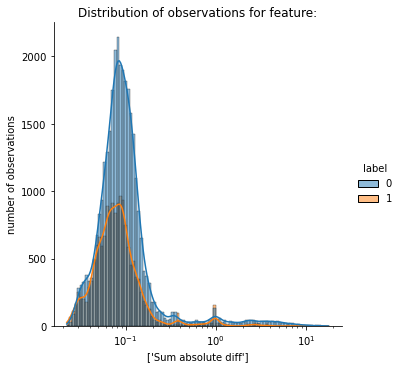

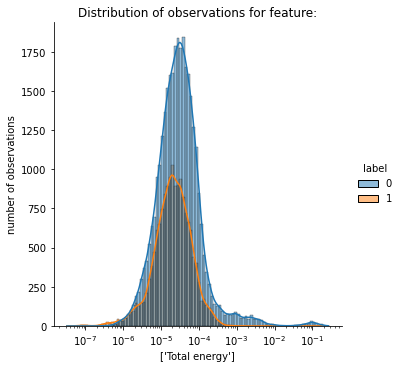

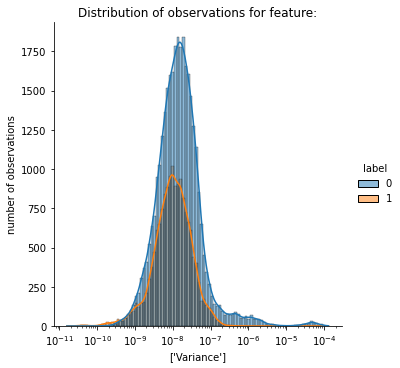

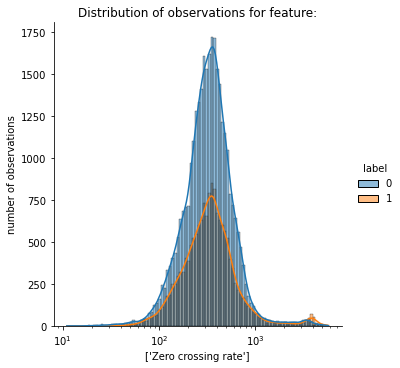

In [12]:
for i in features[59:]:
    
    sns.displot(dataset, x =dataset[i], kde=True, hue='label', bins=100, log_scale=True)
    # plt.legend(prop={'size':12}, )
    plt.title('Distribution of observations for feature:')
    plt.xlabel([i])
    plt.ylabel('number of observations')
    plt.show()

### **Plotting pairwise correlation:**

Text(0.5, 1.0, 'Correlation Heatmap of Features')

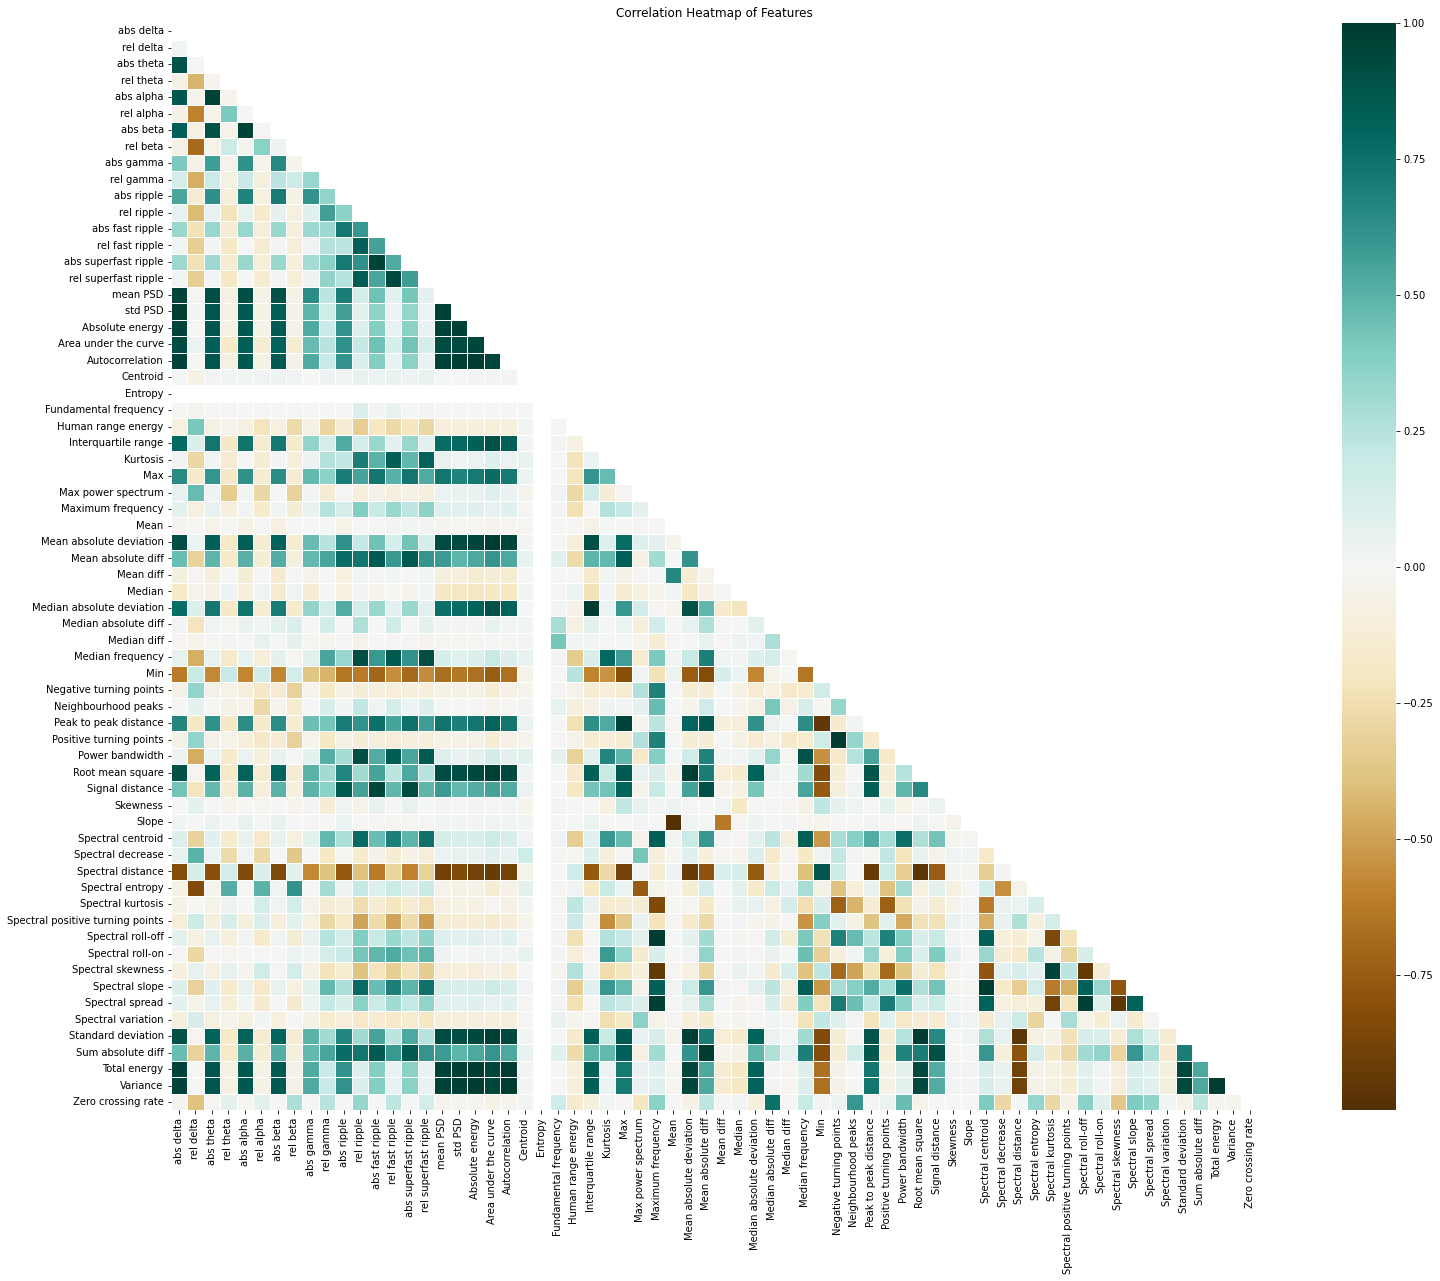

In [14]:
corr = X_features.corr()

# Given that the correlation table is symmetrical, the upper triangel was removed
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(30, 20))

figure = sns.heatmap(corr, mask=mask, cmap= 'BrBG', vmax=1, center=0, square=True, linewidths=.5, annot=False)
figure.set_title('Correlation Heatmap of Features')